<a href="https://colab.research.google.com/github/gomlfx/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/LS_DS_113_Join_and_Reshape_Data_Assignment_Mike_Smith.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [1]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2019-11-08 03:27:26--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.137.118
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.137.118|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  78.1MB/s    in 2.5s    

2019-11-08 03:27:29 (78.1 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [2]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [3]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [4]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

In [5]:
##### YOUR CODE HERE #####
#explore each csv  by sampling item name
import pandas as pd
pd.options.display.max_rows=999
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df = pd.read_csv("aisles.csv")
print(df.shape)
print(df)



(134, 2)
     aisle_id                          aisle
0           1          prepared soups salads
1           2              specialty cheeses
2           3            energy granola bars
3           4                  instant foods
4           5     marinades meat preparation
5           6                          other
6           7                  packaged meat
7           8                bakery desserts
8           9                    pasta sauce
9          10               kitchen supplies
10         11               cold flu allergy
11         12                    fresh pasta
12         13                 prepared meals
13         14         tofu meat alternatives
14         15               packaged seafood
15         16                    fresh herbs
16         17             baking ingredients
17         18   bulk dried fruits vegetables
18         19                  oils vinegars
19         20                   oral hygiene
20         21                packaged cheese
2

In [6]:
import pandas as pd
pd.options.display.max_rows=999
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df = pd.read_csv("departments.csv")
print(df.shape)
print(df)

(21, 2)
    department_id       department
0               1           frozen
1               2            other
2               3           bakery
3               4          produce
4               5          alcohol
5               6    international
6               7        beverages
7               8             pets
8               9  dry goods pasta
9              10             bulk
10             11    personal care
11             12     meat seafood
12             13           pantry
13             14        breakfast
14             15     canned goods
15             16       dairy eggs
16             17        household
17             18           babies
18             19           snacks
19             20             deli
20             21          missing


In [7]:
import pandas as pd
pd.options.display.max_rows=999
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df = pd.read_csv("order_products__prior.csv")
print(df.shape)
print(df)

(32434489, 4)
          order_id  product_id  add_to_cart_order  reordered
0                2       33120                  1          1
1                2       28985                  2          1
2                2        9327                  3          0
3                2       45918                  4          1
4                2       30035                  5          0
...            ...         ...                ...        ...
32434484   3421083       39678                  6          1
32434485   3421083       11352                  7          0
32434486   3421083        4600                  8          0
32434487   3421083       24852                  9          1
32434488   3421083        5020                 10          1

[32434489 rows x 4 columns]


In [8]:
import pandas as pd
pd.options.display.max_rows=999
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df = pd.read_csv("order_products__train.csv")
print(df.shape)
print(df)

(1384617, 4)
         order_id  product_id  add_to_cart_order  reordered
0               1       49302                  1          1
1               1       11109                  2          1
2               1       10246                  3          0
3               1       49683                  4          0
4               1       43633                  5          1
...           ...         ...                ...        ...
1384612   3421063       14233                  3          1
1384613   3421063       35548                  4          1
1384614   3421070       35951                  1          1
1384615   3421070       16953                  2          1
1384616   3421070        4724                  3          1

[1384617 rows x 4 columns]


In [9]:
import pandas as pd
pd.options.display.max_rows=999
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df = pd.read_csv("orders.csv")
print(df.shape)
print(df)

(3421083, 7)
         order_id  user_id eval_set  order_number  order_dow  \
0         2539329        1    prior             1          2   
1         2398795        1    prior             2          3   
2          473747        1    prior             3          3   
3         2254736        1    prior             4          4   
4          431534        1    prior             5          4   
...           ...      ...      ...           ...        ...   
3421078   2266710   206209    prior            10          5   
3421079   1854736   206209    prior            11          4   
3421080    626363   206209    prior            12          1   
3421081   2977660   206209    prior            13          1   
3421082    272231   206209    train            14          6   

         order_hour_of_day  days_since_prior_order  
0                        8                     NaN  
1                        7                    15.0  
2                       12                    21.0  
3     

In [10]:
import pandas as pd
pd.options.display.max_rows=999
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df = pd.read_csv("products.csv")
print(df.shape)
print(df)


(49688, 4)
       product_id                                       product_name  \
0               1                         Chocolate Sandwich Cookies   
1               2                                   All-Seasons Salt   
2               3               Robust Golden Unsweetened Oolong Tea   
3               4  Smart Ones Classic Favorites Mini Rigatoni Wit...   
4               5                          Green Chile Anytime Sauce   
...           ...                                                ...   
49683       49684          Vodka, Triple Distilled, Twist of Vanilla   
49684       49685                 En Croute Roast Hazelnut Cranberry   
49685       49686                                   Artisan Baguette   
49686       49687         Smartblend Healthy Metabolism Dry Cat Food   
49687       49688                             Fresh Foaming Cleanser   

       aisle_id  department_id  
0            61             19  
1           104             13  
2            94          

In [11]:
#departments(21 rows), aisles(134 rows), products (49688 rows) files have string data like banana, etc. 
#logically, you can see less depts vs aisles vs products, etc. So our strings are in products csv. There are 49000 product id's, which is our items?
#search products.csv file for our string matches:
#Bag of Organic Bananas
#Organic Strawberries
#Organic Baby Spinach
#Organic Hass Avocado
#Organic Avocado
#Large Lemon
#Strawberries
#Limes
#Organic Whole Milk
import numpy as np
df=pd.read_csv('products.csv')
print(np.where((df['product_name']=='Banana')))
print(np.where((df['product_name']=='Bag of Organic Bananas')))
print(np.where((df['product_name']=='Organic Strawberries')))
print(np.where((df['product_name']=='Organic Baby Spinach')))
print(np.where((df['product_name']=='Organic Hass Avocado')))
print(np.where((df['product_name']=='Organic Avocado')))
print(np.where((df['product_name']=='Large Lemon')))
print(np.where((df['product_name']=='Strawberries')))
print(np.where((df['product_name']=='Limes')))
print(np.where((df['product_name']=='Organic Whole Milk')))

(array([24851]),)
(array([13175]),)
(array([21136]),)
(array([21902]),)
(array([47208]),)
(array([47765]),)
(array([47625]),)
(array([16796]),)
(array([26208]),)
(array([27844]),)


In [12]:
#Index of items found, print row to confirm our item
print(df.iloc[[24851]])
print(df.iloc[[13175]])
print(df.iloc[[21136]])
print(df.iloc[[21902]])
print(df.iloc[[47208]])
print(df.iloc[[47765]])
print(df.iloc[[47625]])
print(df.iloc[[16796]])
print(df.iloc[[26208]])
print(df.iloc[[27844]])

       product_id product_name  aisle_id  department_id
24851       24852       Banana        24              4
       product_id            product_name  aisle_id  department_id
13175       13176  Bag of Organic Bananas        24              4
       product_id          product_name  aisle_id  department_id
21136       21137  Organic Strawberries        24              4
       product_id          product_name  aisle_id  department_id
21902       21903  Organic Baby Spinach       123              4
       product_id          product_name  aisle_id  department_id
47208       47209  Organic Hass Avocado        24              4
       product_id     product_name  aisle_id  department_id
47765       47766  Organic Avocado        24              4
       product_id product_name  aisle_id  department_id
47625       47626  Large Lemon        24              4
       product_id  product_name  aisle_id  department_id
16796       16797  Strawberries        24              4
       product_id 

In [13]:
#now use product_id to find how many times was each ordered.
df=pd.read_csv('order_products__prior.csv')

df['product_id'].value_counts().head(10)

24852    472565
13176    379450
21137    264683
21903    241921
47209    213584
47766    176815
47626    152657
16797    142951
26209    140627
27845    137905
Name: product_id, dtype: int64

In [0]:
#amazingly the above list automatically listed the values I was searching for and specificed earlier,
#as the top values, and not a long list of values that I thought I'd have to search through.
#this must be why python is a (multi-paradigm) functional language! I love it! A lot more than java.

## Reshape Data Section

- Replicate the lesson code
- Complete the code cells we skipped near the beginning of the notebook
- Table 2 --> Tidy
- Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [0]:
#replicate the lesson code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [16]:
#concatenate
#create df1
df1 = pd.DataFrame([['a',1],['b',2]], columns=['letter','number'])
df1.head()

,letter,number
0,a,1
1,b,2


In [17]:
#create df2
df2 = pd.DataFrame([['c',3],['d',4]],columns=['letter','number'])
df2.head()

,letter,number
0,c,3
1,d,4


In [18]:
#now concat
df3=pd.concat([df1,df2], axis=0)
df3

,letter,number
0,a,1
1,b,2
0,c,3
1,d,4


In [19]:
df4=pd.concat([df1,df2], axis=1)
df4.columns=['a','b','c','d']
df4

,a,b,c,d
0,a,1,c,3
1,b,2,d,4


In [20]:
#concat is simplest, just sticks two df's together. .merge() is the advanced function
#stocknames
stockname = pd.DataFrame({'Symbol': ['AMZN', 'MSFT', 'FB', 'AAPL', 'GOOGL'], 'Name': ['Amazon', 'Microsoft', 'Facebook', 'Apple', 'Google']})
stockname

,Symbol,Name
0,AMZN,Amazon
1,MSFT,Microsoft
2,FB,Facebook
3,AAPL,Apple
4,GOOGL,Google


In [21]:
# stock prices.
openprice = pd.DataFrame({'Symbol': ['AAPL', 'MSFT', 'GOOGL', 'FB', 'AMZN'], 'OpenPrice': [217.51, 96.54, 501.3, 51.45, 1703.34]})
openprice

,Symbol,OpenPrice
0,AAPL,217.51
1,MSFT,96.54
2,GOOGL,501.30
3,FB,51.45
4,AMZN,1703.34


In [22]:
#merge the dataframes
named_stocks=pd.merge(openprice, stockname)
named_stocks
#common key = common column? eyve good job at the lecture! 

,Symbol,OpenPrice,Name
0,AAPL,217.51,Apple
1,MSFT,96.54,Microsoft
2,GOOGL,501.30,Google
3,FB,51.45,Facebook
4,AMZN,1703.34,Amazon


In [23]:
# Create a 3rd dataset of weekly highs
wkhigh = pd.DataFrame({'Symbol': ['FB', 'AMZN', 'AAPL', 'MSFT', 'NFLX'], '52wkHigh': [60.79, 2050.49, 233.47, 110.11, 303.22]})
wkhigh

,Symbol,52wkHigh
0,FB,60.79
1,AMZN,2050.49
2,AAPL,233.47
3,MSFT,110.11
4,NFLX,303.22


In [24]:
#now merge the above 2 datasets
full_stocks=pd.merge(named_stocks, wkhigh, on='Symbol', how='inner')
full_stocks=pd.merge(named_stocks, wkhigh, on='Symbol', how='left')
full_stocks=pd.merge(named_stocks, wkhigh, on='Symbol', how='right')
full_stocks=pd.merge(named_stocks, wkhigh, on='Symbol', how='outer')
full_stocks
#on=, is the common column, how=, is which side is main to contrast

,Symbol,OpenPrice,Name,52wkHigh
0,AAPL,217.51,Apple,233.47
1,MSFT,96.54,Microsoft,110.11
2,GOOGL,501.30,Google,NaN
3,FB,51.45,Facebook,60.79
4,AMZN,1703.34,Amazon,2050.49
5,NFLX,NaN,NaN,303.22


In [25]:
# This is code to display a `.png` inside of a jupyter notebook.
from IPython.display import display, Image
url = 'https://shanelynnwebsite-mid9n9g1q9y8tt.netdna-ssl.com/wp-content/uploads/2017/03/join-types-merge-names.jpg'
venn_diagram = Image(url=url, width=600)
display(venn_diagram)

In [26]:
#reshape: melt and pivot table
full_stocks.shape

(6, 4)

In [27]:
#let's create a simple table for Tidy Data
#start with wide data
myindex=['John Smith', 'Jane Doe', 'Mary Johnson']
mycolumns=['treatmenta', 'treatmentb']

table1 = pd.DataFrame([[np.nan, 2],[16,11],[3,1]],columns=mycolumns,index=myindex)
table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


In [28]:
#transpose
table2 = table1.T # .T means transpose! It moves the rows to columns thus the name wide table
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [29]:
#tidy
#get the columns as a list
list(table1.columns)
table1.columns.tolist()

['treatmenta', 'treatmentb']

In [30]:
#get the index values as a list
table1.index.tolist()

['John Smith', 'Jane Doe', 'Mary Johnson']

In [31]:
#for table1 convert index list into a column using reset_index()
table1 = table1.reset_index()
table1

,index,treatmenta,treatmentb
0,John Smith,NaN,2
1,Jane Doe,16.0,11
2,Mary Johnson,3.0,1


In [32]:
#convert the table from wide to tidy using melt()
tidy=table1.melt(id_vars='index',value_vars=['treatmenta','treatmentb'])
tidy

,index,variable,value
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [33]:
#to clean things up, rename columns
tidy = table1.melt(id_vars='index', value_vars=['treatmenta', 'treatmentb'])
tidy

,index,variable,value
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [34]:
tidy = tidy.rename(columns={
    'index': 'name', 
    'variable': 'trt', 
    'value': 'result'
})
# shorten the `trt` values
tidy.trt = tidy.trt.str.replace('treatment', '')
tidy

,name,trt,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


In [35]:
wide = tidy.pivot_table(index='name', columns='trt', values='result')
wide

trt,a,b
name,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


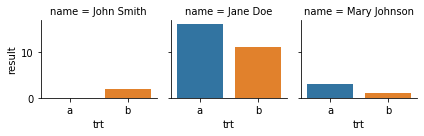

In [36]:
#plot using seaborn
sns.catplot(x='trt', y='result', col='name', 
            kind='bar', data=tidy, height=2);

In [0]:
#more complex examples
#concatenating time-series from Chicago
# Here's some data about Chicago bikesharing.
source_path='https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/Divvy_Trips_dataset/'
q1_path=source_path + 'Divvy_Trips_2015-Q1.csv'
q2_path=source_path + 'Divvy_Trips_2015-Q2.csv'
q3_path=source_path + 'Divvy_Trips_2015-Q3.csv'
q4_path=source_path + 'Divvy_Trips_2015-Q4.csv'

In [38]:
#1st quarter
q1 = pd.read_csv(q1_path)
print(q1.shape)
q1.head()

(1000, 12)


,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,4607895,3/12/2015 7:11,3/12/2015 7:16,2058,322,75,Canal St & Jackson Blvd,284,Michigan Ave & Jackson Blvd,Subscriber,Male,1960.0
1,4467889,1/22/2015 17:07,1/22/2015 17:10,2499,178,16,Wood St & North Ave,58,Marshfield Ave & Cortland St,Subscriber,Male,1977.0
2,4644042,3/16/2015 10:30,3/16/2015 10:36,369,346,91,Clinton St & Washington Blvd,100,Orleans St & Merchandise Mart Plaza,Subscriber,Male,1986.0
3,4598015,3/10/2015 17:19,3/10/2015 17:36,857,1048,134,Peoria St & Jackson Blvd,128,Damen Ave & Chicago Ave,Subscriber,Male,1984.0
4,4467863,1/22/2015 17:02,1/22/2015 17:12,2241,611,52,Michigan Ave & Lake St,192,Canal St & Adams St,Subscriber,Male,1963.0


In [39]:
#2nd quarter?
q2 = pd.read_csv(q2_path)
print(q2.shape)
q2.head()

(1000, 12)


,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,5019758,5/2/2015 10:05,5/2/2015 10:14,72,545,223,Clifton Ave & Armitage Ave,349,Halsted St & Wrightwood Ave,Subscriber,Male,1978.0
1,4874907,4/15/2015 17:21,4/15/2015 17:26,2683,304,197,Michigan Ave & Madison St,174,Canal St & Madison St,Subscriber,Male,1964.0
2,5149598,5/14/2015 6:23,5/14/2015 6:37,3404,806,273,Michigan Ave & 16th St,192,Canal St & Adams St,Subscriber,Male,1982.0
3,5127077,5/12/2015 6:33,5/12/2015 6:55,2374,1342,305,Western Ave & Division St,24,Fairbanks Ct & Grand Ave,Subscriber,Female,1989.0
4,4776193,4/4/2015 19:16,4/4/2015 19:39,2848,1432,85,Michigan Ave & Oak St,304,Broadway & Waveland Ave,Subscriber,Male,1978.0


In [40]:
#do they have exactly the same column names? Otherwise .concat() won't work.
print(q1.columns)
print(q2.columns)

Index(['trip_id', 'starttime', 'stoptime', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear'],
      dtype='object')
Index(['trip_id', 'starttime', 'stoptime', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear'],
      dtype='object')


In [41]:
#check if they're really equal
def diff_check(list1,list2):
  diff=list(set(list1)-set(list2))
  print('difference is:',diff)

diff_check(q1.columns, q2.columns)
#empty value means there's no difference, the columns are exactly equal

difference is: []


In [42]:
#now that we know they're equal, .concat() them
q1_q2=pd.concat([q1,q2], axis=0)
(q1_q2)

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,4607895,3/12/2015 7:11,3/12/2015 7:16,2058,322,75,Canal St & Jackson Blvd,284,Michigan Ave & Jackson Blvd,Subscriber,Male,1960.0
1,4467889,1/22/2015 17:07,1/22/2015 17:10,2499,178,16,Wood St & North Ave,58,Marshfield Ave & Cortland St,Subscriber,Male,1977.0
2,4644042,3/16/2015 10:30,3/16/2015 10:36,369,346,91,Clinton St & Washington Blvd,100,Orleans St & Merchandise Mart Plaza,Subscriber,Male,1986.0
3,4598015,3/10/2015 17:19,3/10/2015 17:36,857,1048,134,Peoria St & Jackson Blvd,128,Damen Ave & Chicago Ave,Subscriber,Male,1984.0
4,4467863,1/22/2015 17:02,1/22/2015 17:12,2241,611,52,Michigan Ave & Lake St,192,Canal St & Adams St,Subscriber,Male,1963.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,5439537,6/2/2015 18:22,6/2/2015 19:42,4381,4793,364,Larrabee St & Oak St,48,Larrabee St & Kingsbury St,Customer,NaN,NaN
996,5652110,6/15/2015 15:08,6/15/2015 15:31,270,1396,3,Shedd Aquarium,90,Millennium Park,Customer,NaN,NaN
997,5899245,6/28/2015 16:55,6/28/2015 17:02,4542,426,143,Sedgwick St & Webster Ave,118,Sedgwick St & North Ave,Subscriber,Male,1988.0
998,4774623,4/4/2015 17:09,4/4/2015 17:18,742,533,47,State St & Kinzie St,46,Wells St & Walton St,Subscriber,Female,1986.0


In [43]:
#now add q3 and 4
q3=pd.read_csv(q3_path)
q4=pd.read_csv(q4_path)
full_year=pd.concat([q1,q2,q3,q4],axis=0)
full_year.shape

(4000, 12)

In [44]:
#merging datasets
source1='https://raw.githubusercontent.com/austinlasseter/dash-virginia-counties/master/resources/acs2017_county_data.csv'
census=pd.read_csv(source1)
census.sample(5)

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
1736,31165,Nebraska,Sioux County,1256,647,609,3.8,90.0,0.4,0.2,0.2,0.0,998,45375,7960,26852,2789,12.4,18.7,55.6,8.2,16.5,14.4,5.3,55.5,9.8,0.0,15.6,0.8,18.3,18.9,660,61.7,18.8,19.5,0.0,0.0
6,1013,Alabama,Butler County,20126,9416,10710,0.3,52.2,44.7,0.1,1.1,0.0,15459,36326,2701,19004,943,24.4,34.8,26.9,17.3,18.5,11.6,25.7,83.6,12.6,0.0,0.9,0.9,2.0,23.2,7727,79.1,15.3,5.3,0.3,7.6
609,17029,Illinois,Coles County,52540,25395,27145,2.4,91.0,3.8,0.2,1.2,0.0,42302,41907,1985,26060,1725,21.0,23.4,31.2,19.5,24.6,7.5,17.2,77.0,10.0,0.9,5.6,2.0,4.5,16.3,24725,75.9,17.5,6.4,0.1,7.3
2943,51750,Virginia,Radford city,17380,8526,8854,2.9,83.3,9.3,0.0,1.6,0.0,15378,36082,5918,19539,2457,37.5,20.2,32.2,26.7,25.7,3.7,11.7,78.0,7.1,0.7,10.7,2.0,1.5,19.1,7455,74.1,22.3,3.4,0.2,7.5
2867,51097,Virginia,King and Queen County,7052,3524,3528,3.2,66.1,25.8,0.6,0.0,0.0,5590,51495,9813,25831,2468,15.6,35.3,27.7,20.5,17.4,18.7,15.6,82.7,7.1,0.2,0.4,3.9,5.7,34.6,3157,74.8,18.9,6.3,0.0,4.4


In [45]:
census.columns

Index(['CountyId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'VotingAgeCitizen',
       'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [46]:
commute=census[['CountyId', 'State','County','MeanCommute']]
commute.sample(3)

,CountyId,State,County,MeanCommute
20,1041,Alabama,Crenshaw County,28.6
3089,55083,Wisconsin,Oconto County,26.6
1298,26135,Michigan,Oscoda County,20.4


In [47]:
commute['MeanCommute'].mean()

23.47453416149071

In [48]:
#let's add some data from USDA
source2='https://github.com/austinlasseter/dash-virginia-counties/blob/master/resources/ruralurbancodes2013.xls?raw=true'
usda=pd.read_excel(source2)
usda

,FIPS,State,County_Name,Population_2010,RUCC_2013,Description
0,1001,AL,Autauga County,54571,2,"Metro - Counties in metro areas of 250,000 to ..."
1,1003,AL,Baldwin County,182265,3,Metro - Counties in metro areas of fewer than ...
2,1005,AL,Barbour County,27457,6,"Nonmetro - Urban population of 2,500 to 19,999..."
3,1007,AL,Bibb County,22915,1,Metro - Counties in metro areas of 1 million p...
4,1009,AL,Blount County,57322,1,Metro - Counties in metro areas of 1 million p...
...,...,...,...,...,...,...
3216,72145,PR,Vega Baja Municipio,59662,1,Metro - Counties in metro areas of 1 million p...
3217,72147,PR,Vieques Municipio,9301,7,"Nonmetro - Urban population of 2,500 to 19,999..."
3218,72149,PR,Villalba Municipio,26073,2,"Metro - Counties in metro areas of 250,000 to ..."
3219,72151,PR,Yabucoa Municipio,37941,1,Metro - Counties in metro areas of 1 million p...


In [49]:
#what's a RUCC code?
usda.groupby('RUCC_2013')[['Description']].min()



,Description
RUCC_2013,
1,Metro - Counties in metro areas of 1 million p...
2,"Metro - Counties in metro areas of 250,000 to ..."
3,Metro - Counties in metro areas of fewer than ...
4,"Nonmetro - Urban population of 20,000 or more,..."
5,"Nonmetro - Urban population of 20,000 or more,..."
6,"Nonmetro - Urban population of 2,500 to 19,999..."
7,"Nonmetro - Urban population of 2,500 to 19,999..."
8,"Nonmetro - Completely rural or less than 2,500..."
9,"Nonmetro - Completely rural or less than 2,500..."


In [50]:
usda=usda[['FIPS','RUCC_2013']]
usda.head(3)

,FIPS,RUCC_2013
0,1001,2
1,1003,3
2,1005,6


In [51]:
commute.head(2)
commute.rename(columns={'CountyId':'FIPS'})

,FIPS,State,County,MeanCommute
0,1001,Alabama,Autauga County,25.8
1,1003,Alabama,Baldwin County,27.0
2,1005,Alabama,Barbour County,23.4
3,1007,Alabama,Bibb County,30.0
4,1009,Alabama,Blount County,35.0
...,...,...,...,...
3215,72145,Puerto Rico,Vega Baja Municipio,31.6
3216,72147,Puerto Rico,Vieques Municipio,14.9
3217,72149,Puerto Rico,Villalba Municipio,28.4
3218,72151,Puerto Rico,Yabucoa Municipio,30.5


In [52]:
#merge  with census data
metro_commute=pd.merge(commute,usda,how='left',left_on='CountyId',right_on='FIPS')
metro_commute.sample(3)

,CountyId,State,County,MeanCommute,FIPS,RUCC_2013
1675,31043,Nebraska,Dakota County,14.7,31043.0,3.0
151,5081,Arkansas,Little River County,24.8,5081.0,3.0
2672,48299,Texas,Llano County,24.4,48299.0,7.0


In [53]:
#is there any difference in commutes by rural-urban designation?
metro_commute[metro_commute['RUCC_2013']==1]['MeanCommute'].mean()

29.51334745762712

In [57]:
#what about rural
metro_commute[metro_commute['RUCC_2013']==5]['MeanCommute'].mean()

18.686956521739138

In [64]:
#compare means all in one blow
drivetimes = metro_commute.groupby('RUCC_2013')[['MeanCommute']].std()
drivetimes

,MeanCommute
RUCC_2013,
1.0,4.611369
2.0,3.996823
3.0,4.550611
4.0,3.413341
5.0,3.223752
6.0,4.540535
7.0,4.618597
8.0,5.823209
9.0,5.835349


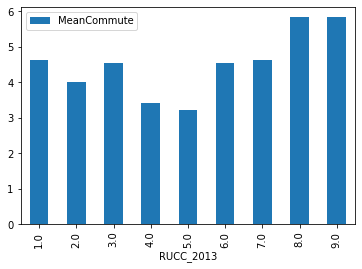

In [65]:
#display the above using pandas plotting function
drivetimes.plot(kind='bar');


In [66]:
#instacart dataset: pd.concat, pd.merge
#get compressed file in tarball format
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
#decompress tarball file
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz
# Percent sign == "magic" command which changes the underlying state (i.e., new current working directory).
%cd instacart_2017_05_01
# bash command: list the contents of that folder.
!ls *.csv

--2019-11-08 03:40:07--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.9.70
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.9.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  77.9MB/s    in 2.5s    

2019-11-08 03:40:09 (77.9 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._o

In [68]:
order_products__prior = pd.read_csv('order_products__prior.csv')
print(order_products__prior.shape)
order_products__prior.sample(3)

(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
657786,69539,47716,13,1
10671619,1126550,24964,27,0
24416377,2575094,35535,14,1


In [70]:
order_products__train = pd.read_csv('order_products__train.csv')
print(order_products__train.shape)
order_products__train.head(3)

(1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0


In [71]:
orders = pd.read_csv('orders.csv')
orders.head(3)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0


In [0]:
products = pd.read_csv('products.csv')

In [75]:
orders.sample(2)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
2691636,2424333,162117,prior,2,2,8,8.0
827824,1171521,49791,prior,21,6,0,13.0


In [0]:
cols=['user_id', 'order_id', 'order_nmber','order_dow','order_hour_of_day']
orders=orders

In [0]:
##### YOUR CODE HERE #####

## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



In [0]:
##### YOUR CODE HERE #####

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [0]:
##### YOUR CODE HERE #####